# PS2 - Window-based Stereo Matching

## 1

### a)

Left image:

![](leftTest.png)

Right image: 

![](rightTest.png)

In [1]:
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import time

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)  # To print full matrix

from numba import jit, prange  # Automatic python code acceleration with only CPU, using a decorator

In [2]:
@jit(nopython=True, parallel=True)
def disparity_ssd(img_height, img_width, half_window_height, half_window_width, d_min, d_max, source_img, target_img, source_is_left=True):
    disparity = np.zeros((img_height, img_width), dtype=np.uint8)
    for row in prange(half_window_height, img_height - half_window_height):
        if source_is_left:
            for col in prange(half_window_width + d_max, img_width - half_window_width):
                ssd_array = np.zeros(d_max - d_min + 1, dtype = np.uint)
                for k, d in enumerate(range(d_min, d_max + 1)):
                    source_window = source_img[row - half_window_height:row + half_window_height + 1, col - half_window_width:col + half_window_width + 1]
                    target_window = target_img[row - half_window_height:row + half_window_height + 1, col - half_window_width - d:col + half_window_width + 1 - d]
                    ssd_array[k] = np.sum(np.square(source_window - target_window))
                disparity[row, col] = np.argmin(ssd_array) + d_min
        else:
            for col in prange(half_window_width, img_width - half_window_width - d_max):
                ssd_array = np.zeros(d_max - d_min + 1, dtype = np.uint)
                for k, d in enumerate(range(d_min, d_max + 1)):
                    source_window = source_img[row - half_window_height:row + half_window_height + 1, col - half_window_width:col + half_window_width + 1]
                    target_window = target_img[row - half_window_height:row + half_window_height + 1, col - half_window_width + d:col + half_window_width + 1 + d]
                    ssd_array[k] = np.sum(np.square(source_window - target_window))
                disparity[row, col] = np.argmin(ssd_array) + d_min
    return disparity

Time consumed for disparity calculation (s): 8.87


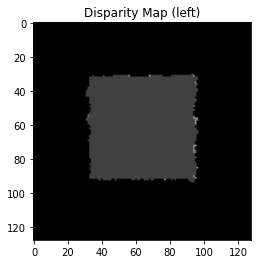

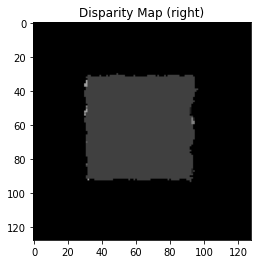

In [3]:
img1_left, img1_right = cv.imread("leftTest.png", cv.IMREAD_GRAYSCALE), cv.imread("rightTest.png", cv.IMREAD_GRAYSCALE)
# Transform img from numpy uint to int type for matrix subtraction operation later
img1_left, img1_right = img1_left.astype(np.int), img1_right.astype(np.int)
img1_height, img1_width= img1_left.shape
window_height, window_width = 5, 5
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 0, 5

start = time.time()
disparity_left = disparity_ssd(img1_height, img1_width, half_window_height, half_window_width, d_min, d_max, img1_left, img1_right)
disparity_right = disparity_ssd(img1_height, img1_width, half_window_height, half_window_width, d_min, d_max, img1_right, img1_left, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left*32, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*32, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

# plt.imshow(img1_left, cmap='gray', vmin=0, vmax=255)
# plt.show()

# # For verification
# stereo = cv.StereoBM_create(numDisparities=d_max, blockSize=11)  # numDisparities needs to be multiple of 16
# disparity = stereo.compute(img1_left,img1_right)
# # print(disparity)
# plt.imshow(disparity,'gray')
# plt.show()

## 2

Left image: 

![](proj2-pair1-L.png)

Right image: 

![](proj2-pair1-R.png)

### a)

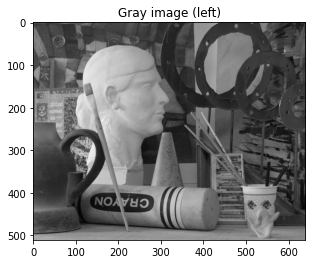

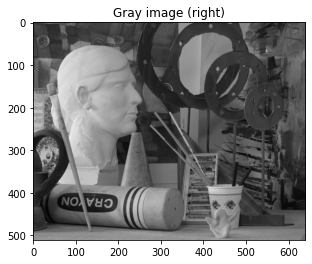

Time consumed for disparity calculation (s): 2.53


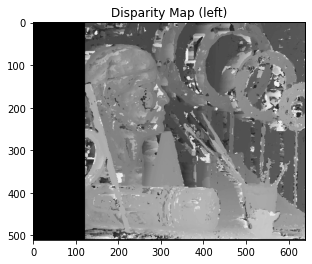

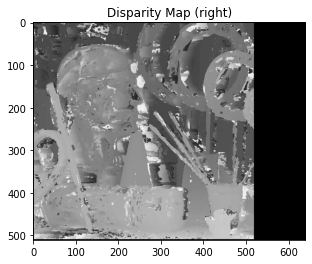

In [4]:
img2_left, img2_right = cv.imread("proj2-pair1-L.png"), cv.imread("proj2-pair1-R.png")
img2_left, img2_right = cv.cvtColor(img2_left, cv.COLOR_BGR2GRAY), cv.cvtColor(img2_right, cv.COLOR_BGR2GRAY)
img2_left, img2_right = img2_left.astype(np.int), img2_right.astype(np.int)
img2_height, img2_width= img2_left.shape
window_height, window_width = 5, 5
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

plt.imshow(img2_left, cmap='gray', vmin=0, vmax=255)
plt.title('Gray image (left)')
plt.show()

plt.imshow(img2_right, cmap='gray', vmin=0, vmax=255)
plt.title('Gray image (right)')
plt.show()

start = time.time()
disparity_left = disparity_ssd(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_left, img2_right)
disparity_right = disparity_ssd(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_right, img2_left, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

# print(np.min(disparity_left[np.nonzero(disparity_left)]), np.min(disparity_right[np.nonzero(disparity_right)]))
# print(np.max(disparity_left), np.max(disparity_right))

plt.imshow(disparity_left*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

### b)

Left ground truth: 

![](proj2-pair1-Disp-L.png)

Right ground truth:

![](proj2-pair1-Disp-R.png)

When doing window-based stereo matching, there can be some noises in the resulting disparity maps as shown in the cell above. In fact, there is no perfect value for window size. We generally want the window size to be large enough to enclose enough texture variation (to smooth out the noises) and small enough so that the pixels inside can be considered to share the same depth. However, for each area of the image, the best value of window size is generally different. Therefore, by taking a constant window size for the entire image, the output disparity map cannot be perfect. 

In the ground truths, there all noises are smoothed out while the boundary of objects are clear (meaning that smoothing is just right, not too much). In my calculations above, the window size is chosen to be a balance point such that there aren't too much noise nor too much smoothing. 

## 3

### a)

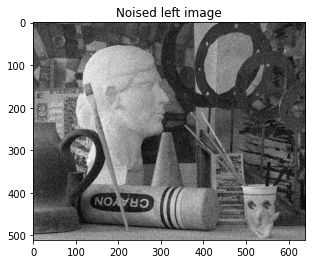

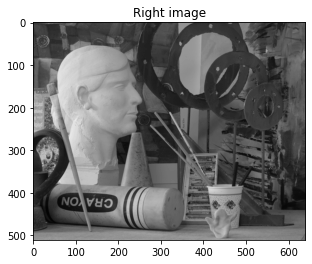

Time consumed for disparity calculation (s): 2.42


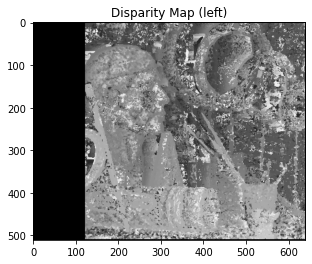

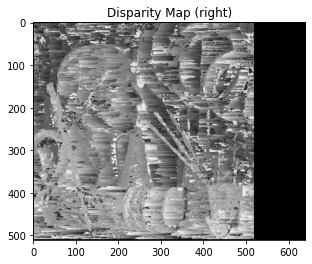

In [5]:
mu, sigma = 0, 20
noise = np.random.normal(mu, sigma, img2_left.shape).astype(np.int8)

# unlike addition in numpy which is a modulo operation, cv.add saturates
img2_left_noised = cv.add(img2_left, noise, dtype=0)  # 0 (for dtype) corresponds to CV_8U

img2_left_noised, img2_right = img2_left_noised.astype(np.int), img2_right.astype(np.int)

plt.imshow(img2_left_noised, cmap='gray', vmin=0, vmax=255)
plt.title('Noised left image')
plt.show()

plt.imshow(img2_right, cmap='gray', vmin=0, vmax=255)
plt.title('Right image')
plt.show()

window_height, window_width = 5, 5
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

start = time.time()
disparity_left = disparity_ssd(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_left_noised, img2_right)
disparity_right = disparity_ssd(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_right, img2_left_noised, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

It can be seen that SSD is not robust to Gaussian noise. In fact, when Gaussian noise is added, at the correct disparity the SSD is no longer minimum, but a sum of squares of independent Guassian variables. When sigma is large, like in our case, this sum can be large such that at the correct disparity we won't have the minimum SSD anymore. When this happens, the correct disparity cannot be discovered, and the disparity maps' quality is much worse (much more noises). 

### b)

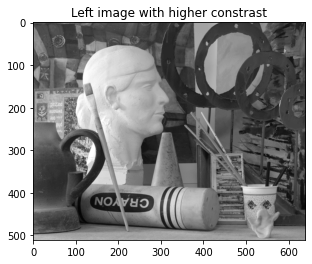

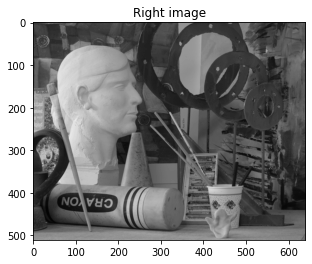

Time consumed for disparity calculation (s): 2.49


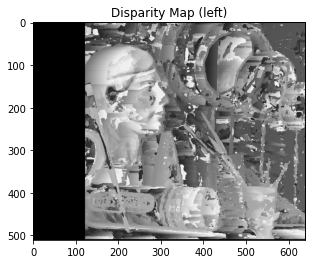

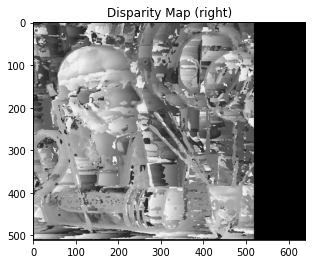

In [6]:
img2_left_contrast = cv.multiply(img2_left, 1.1)
img2_left_contrast[img2_left_contrast > 255] = 255  # Saturation if greater than 255
img2_left_contrast = img2_left_contrast.astype(np.uint8)

img2_left_contrast, img2_right = img2_left_contrast.astype(np.int), img2_right.astype(np.int)

plt.imshow(img2_left_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('Left image with higher constrast')
plt.show()

plt.imshow(img2_right, cmap='gray', vmin=0, vmax=255)
plt.title('Right image')
plt.show()

window_height, window_width = 5, 5
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

start = time.time()
disparity_left = disparity_ssd(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_left_contrast, img2_right)
disparity_right = disparity_ssd(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_right, img2_left_contrast, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

It can be seen that the quality of results are much worse than that of part 1. In fact, similar to part 3.a), with an increase of constrast (of one image), at the correct disparity value the SSD is not necessarily the minimum. This introduces some noises as seen in the disparity maps just above. 

## 4

### a)

In [7]:
# Personal implementation of normalized cross correlation

@jit(nopython=True, parallel=True)
def disparity_corr_normed(img_height, img_width, half_window_height, half_window_width, d_min, d_max, source_img, target_img, source_is_left=True):
    disparity = np.zeros((img_height, img_width), dtype=np.uint8)
    for row in prange(half_window_height, img_height - half_window_height):
        if source_is_left:
            for col in prange(half_window_width + d_max, img_width - half_window_width):
                corr_normed_array = np.zeros(d_max - d_min + 1, dtype = np.double)
                source_window = source_img[row - half_window_height:row + half_window_height + 1, col - half_window_width:col + half_window_width + 1]
                source_denominator = np.sqrt(np.sum(np.square(source_window)))
                for k, d in enumerate(range(d_min, d_max + 1)):
                    target_window = target_img[row - half_window_height:row + half_window_height + 1, col - half_window_width - d:col + half_window_width + 1 - d]
                    target_denominator = np.sqrt(np.sum(np.square(target_window)))
                    corr_normed_array[k] = np.sum(np.multiply(source_window, target_window))/source_denominator/target_denominator
                disparity[row, col] = np.argmax(corr_normed_array) + d_min
        else:
            for col in prange(half_window_width, img_width - half_window_width - d_max):
                corr_normed_array = np.zeros(d_max - d_min + 1, dtype = np.double)
                source_window = source_img[row - half_window_height:row + half_window_height + 1, col - half_window_width:col + half_window_width + 1]
                source_denominator = np.sqrt(np.sum(np.square(source_window)))
                for k, d in enumerate(range(d_min, d_max + 1)):
                    target_window = target_img[row - half_window_height:row + half_window_height + 1, col - half_window_width + d:col + half_window_width + 1 + d]
                    target_denominator = np.sqrt(np.sum(np.square(target_window)))
                    corr_normed_array[k] = np.sum(np.multiply(source_window, target_window))/source_denominator/target_denominator
                disparity[row, col] = np.argmax(corr_normed_array) + d_min
    return disparity

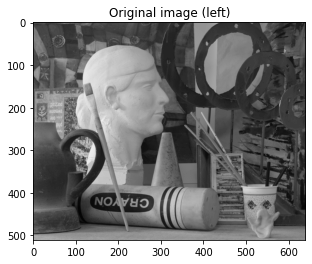

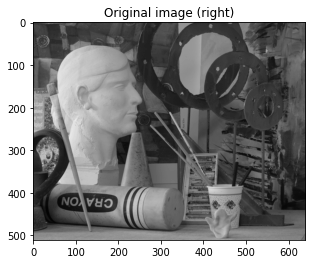

Time consumed for disparity calculation (s): 14.07


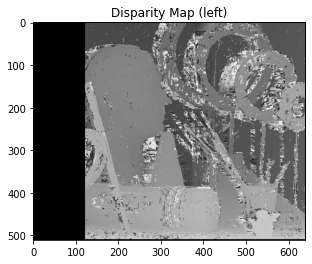

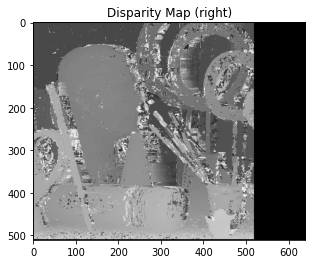

In [8]:
img2_left, img2_right = cv.imread("proj2-pair1-L.png"), cv.imread("proj2-pair1-R.png")
img2_left, img2_right = cv.cvtColor(img2_left, cv.COLOR_BGR2GRAY), cv.cvtColor(img2_right, cv.COLOR_BGR2GRAY)
img2_left, img2_right = img2_left.astype(np.double), img2_right.astype(np.double)
img2_height, img2_width= img2_left.shape
window_height, window_width = 5, 5
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

plt.imshow(img2_left, cmap='gray', vmin=0, vmax=255)
plt.title('Original image (left)')
plt.show()

plt.imshow(img2_right, cmap='gray', vmin=0, vmax=255)
plt.title('Original image (right)')
plt.show()

start = time.time()
disparity_left = disparity_corr_normed(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_left, img2_right)
disparity_right = disparity_corr_normed(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_right, img2_left, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

# print(np.min(disparity_left[np.nonzero(disparity_left)]), np.min(disparity_right[np.nonzero(disparity_right)]))
# print(np.max(disparity_left), np.max(disparity_right))

plt.imshow(disparity_left*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

Comparison with SSD:
    1. Normalized cross correlation -> more computation
    2. Normalized cross correlation -> less sensitive to outliers (since we do not take the square in the numerator and we also do normalization in the denominator)
    3. When there is not too much noise nor any difference in contrast between the images, normalized cross correlation performs similar to SSD. In our case the resulting disparity map is slightly better (or about the same). 

### b)

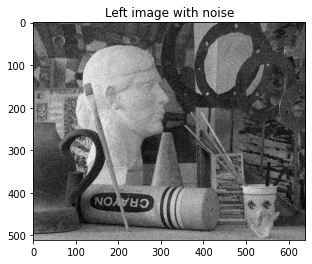

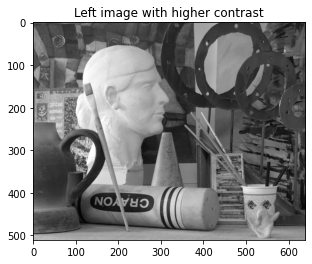

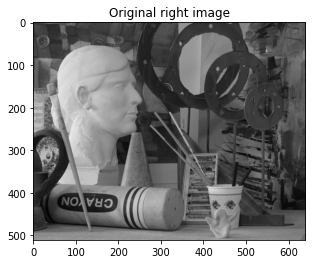

Time consumed for disparity calculation (s): 9.97


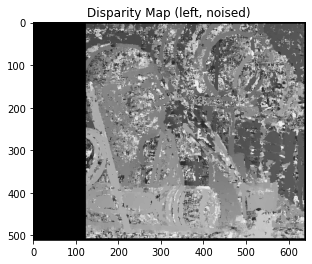

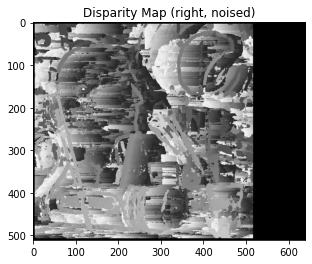

Time consumed for disparity calculation (s): 9.32


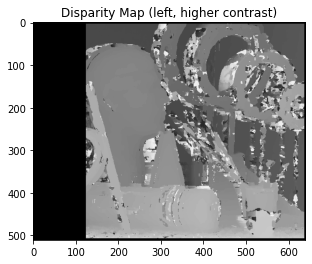

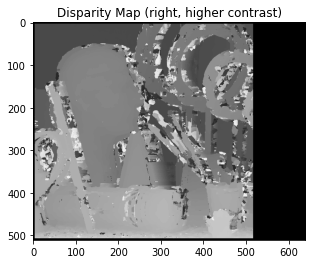

In [9]:
mu, sigma = 0, 20
noise = np.random.normal(mu, sigma, img2_left.shape).astype(np.int8)
# unlike addition in numpy which is a modulo operation, cv.add saturates
img2_left_noised = cv.add(img2_left, noise, dtype=0)  # 0 (for dtype) corresponds to CV_8U

img2_left_contrast = cv.multiply(img2_left, 1.1)
img2_left_contrast[img2_left_contrast > 255] = 255  # Saturation if greater than 255
img2_left_contrast = img2_left_contrast.astype(np.uint8)

img2_left_noised, img2_left_contrast = img2_left_noised.astype(np.double), img2_left_contrast.astype(np.double)

plt.imshow(img2_left_noised, cmap='gray', vmin=0, vmax=255)
plt.title('Left image with noise')
plt.show()

plt.imshow(img2_left_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('Left image with higher contrast')
plt.show()

plt.imshow(img2_right, cmap='gray', vmin=0, vmax=255)
plt.title('Original right image')
plt.show()

window_height, window_width = 9, 9
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

start = time.time()
disparity_left_noised = disparity_corr_normed(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_left_noised, img2_right)
disparity_right_noised = disparity_corr_normed(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_right, img2_left_noised, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left_noised*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left, noised)')
plt.show()

plt.imshow(disparity_right_noised*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right, noised)')
plt.show()

start = time.time()
disparity_left_contrast = disparity_corr_normed(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_left_contrast, img2_right)
disparity_right_contrast = disparity_corr_normed(img2_height, img2_width, half_window_height, half_window_width, d_min, d_max, img2_right, img2_left_contrast, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left_contrast*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left, higher contrast)')
plt.show()

plt.imshow(disparity_right_contrast*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right, higher contrast)')
plt.show()

As can be seen above, normalized correlation, due to the normalization applied, is robust against change of contrast. However, it is still sentitive to Gaussian noise (for the same reason as SSD does). 

## 5

Left image: 

![](proj2-pair2-L.png)

Right image: 

![](proj2-pair2-R.png)

Left ground truth: 

![](proj2-pair2-Disp-L.png)

Right ground truth: 

![](proj2-pair2-Disp-R.png)

### a)

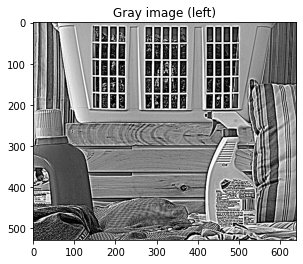

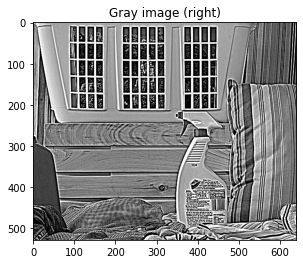

Time consumed for disparity calculation (s): 6.15


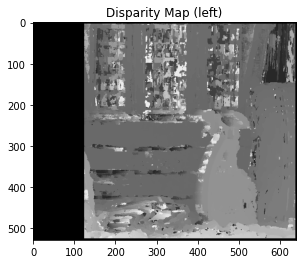

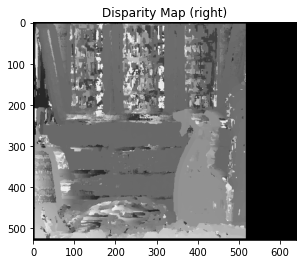

In [10]:
# Using SSD
img3_left, img3_right = cv.imread("proj2-pair2-L.png"), cv.imread("proj2-pair2-R.png")
img3_left, img3_right = cv.cvtColor(img3_left, cv.COLOR_BGR2GRAY), cv.cvtColor(img3_right, cv.COLOR_BGR2GRAY)

kernel_size = 11

# Smooth
# img3_left, img3_right = cv.GaussianBlur(img3_left,(kernel_size,kernel_size),0), cv.GaussianBlur(img3_right,(kernel_size,kernel_size),0)

# Sharpen
sharpen_degree = 10
img3_left = cv.addWeighted(img3_left, sharpen_degree, cv.GaussianBlur(img3_left,(kernel_size,kernel_size), 0), -sharpen_degree+1, 0)
img3_right = cv.addWeighted(img3_right, sharpen_degree, cv.GaussianBlur(img3_right,(kernel_size,kernel_size), 0), -sharpen_degree+1, 0)

img3_left, img3_right = img3_left.astype(np.int), img3_right.astype(np.int)
img3_height, img3_width= img3_left.shape
window_height, window_width = 9, 9
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

plt.imshow(img3_left, cmap='gray', vmin=0, vmax=255)
plt.title('Gray image (left)')
plt.show()

plt.imshow(img3_right, cmap='gray', vmin=0, vmax=255)
plt.title('Gray image (right)')
plt.show()

start = time.time()
disparity_left = disparity_ssd(img3_height, img3_width, half_window_height, half_window_width, d_min, d_max, img3_left, img3_right)
disparity_right = disparity_ssd(img3_height, img3_width, half_window_height, half_window_width, d_min, d_max, img3_right, img3_left, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

For SSD-based window matching, sharpening seems to enhance the performance. One explanation is that sharpening accentuates the difference of one pixel with its neighbors, making it easier to distinguish between different windows. However, regardless of different parameter values, the disparity inside the small windows at the top of the images cannot be correctly extracted. One possible explanation is that the same small window in the left and right image does not look the same, due to perspective effect. This results in the failure of SSD-based matching.

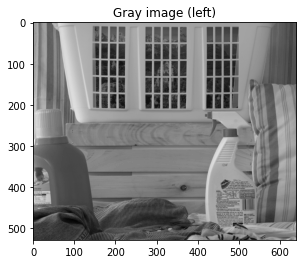

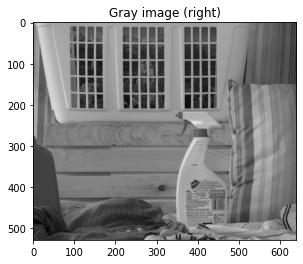

Time consumed for disparity calculation (s): 19.21


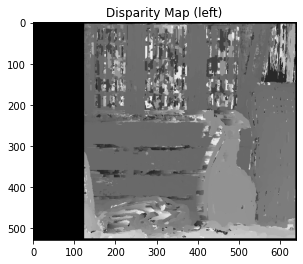

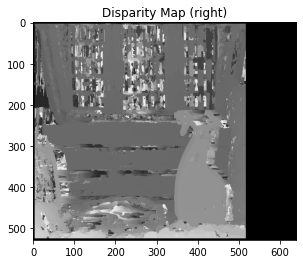

In [11]:
# Using normalized cross correlation
img3_left, img3_right = cv.imread("proj2-pair2-L.png"), cv.imread("proj2-pair2-R.png")
img3_left, img3_right = cv.cvtColor(img3_left, cv.COLOR_BGR2GRAY), cv.cvtColor(img3_right, cv.COLOR_BGR2GRAY)

kernel_size = 11

# Smooth
# img3_left, img3_right = cv.GaussianBlur(img3_left,(kernel_size,kernel_size),0), cv.GaussianBlur(img3_right,(kernel_size,kernel_size),0)

# Sharpen
# sharpen_degree = 10
# img3_left = cv.addWeighted(img3_left, sharpen_degree, cv.GaussianBlur(img3_left,(kernel_size,kernel_size), 0), -sharpen_degree+1, 0)
# img3_right = cv.addWeighted(img3_right, sharpen_degree, cv.GaussianBlur(img3_right,(kernel_size,kernel_size), 0), -sharpen_degree+1, 0)

img3_left, img3_right = img3_left.astype(np.int), img3_right.astype(np.int)
img3_height, img3_width= img3_left.shape
window_height, window_width = 9, 9
assert (window_height*window_width % 2 == 1)  # Both window height and width nend to be odd
half_window_height, half_window_width = (window_height-1)//2, (window_width-1)//2
d_min, d_max = 20, 120

plt.imshow(img3_left, cmap='gray', vmin=0, vmax=255)
plt.title('Gray image (left)')
plt.show()

plt.imshow(img3_right, cmap='gray', vmin=0, vmax=255)
plt.title('Gray image (right)')
plt.show()

start = time.time()
disparity_left = disparity_corr_normed(img3_height, img3_width, half_window_height, half_window_width, d_min, d_max, img3_left, img3_right)
disparity_right = disparity_corr_normed(img3_height, img3_width, half_window_height, half_window_width, d_min, d_max, img3_right, img3_left, False)
print(f"Time consumed for disparity calculation (s): {round((time.time() - start), 2)}")

plt.imshow(disparity_left*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (left)')
plt.show()

plt.imshow(disparity_right*2, cmap='gray', vmin=0, vmax=255)
plt.title('Disparity Map (right)')
plt.show()

For normalized cross correlation based window matching, neither smoothing nor sharpening is beneficial. This time sharpening no longer enhances the performance as normalization cancels it out. Besides, the same problem (disparity inside small windows cannot be correctly extracted) persists for this case. The reason should be same as above. 